In [3]:
%pip install pandas scikit-learn seaborn numpy matplotlib


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/114.6 kB ? eta -:--:--
     -------------------- ------------------ 61.4/114.6 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 114.6/114.6 kB 1.7 MB/s eta 0:00:00
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/8.1 MB 26.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.0/8.1 MB 37.8 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 36.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.5/8.1 MB 20.0 MB/s eta 0:00:01
   ----------------- ---------------------- 3.5/8.1 MB 15.9 MB/s eta 0:00:01
   ------------------ --------------------- 3.8/8.1 MB 13


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=3,n_redundant=1, n_classes=2,random_state=42)


[[ 2.48547786  2.39963589 -1.46526917]
 [ 2.20403962 -1.06965652  0.00979545]
 [-0.5726534  -0.75494788  0.42032991]
 ...
 [-0.41608875  0.46668963 -0.11024494]
 [-1.57936997  2.48498245 -0.71060102]
 [-0.43277356  0.89093028 -0.28069604]] [1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1
 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0
 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0
 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 0 0 1 1

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.33,random_state=42
)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
y_pred=classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [27]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred,y_test))

[[156  18]
 [  9 147]]
0.9181818181818182
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       174
           1       0.89      0.94      0.92       156

    accuracy                           0.92       330
   macro avg       0.92      0.92      0.92       330
weighted avg       0.92      0.92      0.92       330



In [28]:
accuracy = (156 + 147) / (156 + 18 + 9 + 147)
precision = 147 / (147 + 18)
recall = 147 / (147 + 9)
f1 = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9181818181818182
Precision: 0.8909090909090909
Recall: 0.9423076923076923
F1-score: 0.9158878504672897


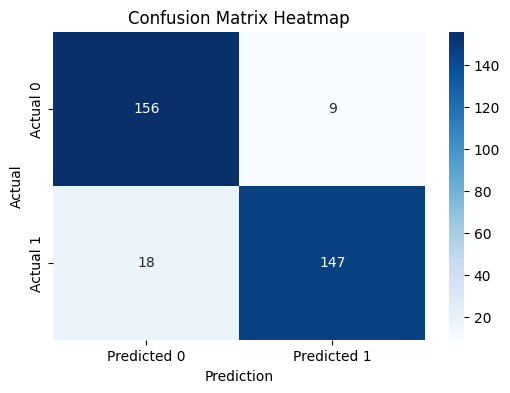

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])

plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()